<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [1]:
import tensorflow as tf
import os
print(os.getcwd)

<built-in function getcwd>


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir("/content/gdrive/MyDrive/lab nn")

In [4]:
rank_0=tf.constant(99.99)
print(rank_0)
print(type(rank_0))

tf.Tensor(99.99, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [5]:
rank_1=tf.constant( [9,8,7,6,5])
print(rank_1)
print(type(rank_1))

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [6]:
print(tf.add(rank_1,7))

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


In [7]:
print(rank_1+7)

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [8]:
rank_2=tf.constant([[1, 2, 3], [ 4,5,6]])
print(rank_2)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [9]:
tf.reshape(rank_2,[3,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [10]:
tf.reshape(rank_2,[-1,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

### Check the dtype, number of axes and the shape of tensor

In [12]:
print(rank_2.dtype)
print(rank_2.ndim)
print(rank_2.shape)

<dtype: 'int32'>
2
(2, 3)


- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [14]:
import pandas as pd
import numpy as np

## Question 1

### Load the data
- Load the data, check the shape of data

In [15]:
df=pd.read_csv('car_data-1.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [17]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [18]:
def map_num(num):
    try:
        if type(num) == str:
            return float(num.split()[0])
        else:
            return num
    except:
        return np.nan


In [19]:
df[['mileage','engine','max_power']] = df[['mileage','engine','max_power']].applymap(map_num)


In [ ]:
df['owner']=df['owner'].apply(lambda x: sum([ord(digit) for digit in x]))

In [ ]:
df.owner.unique()

array([1075, 1159, 1062, 1782, 1264])

In [ ]:
categ_df=df[[ 'fuel','seller_type','transmission' ]]
One_hot_enc_df_categ=pd.get_dummies(categ_df)
One_hot_enc_df_categ

In [ ]:
One_hot_enc_df_categ=pd.get_dummies(categ_df)
One_hot_enc_df_categ

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
8123,0,0,0,1,0,1,0,0,1
8124,0,1,0,0,0,1,0,0,1
8125,0,1,0,0,0,1,0,0,1
8126,0,1,0,0,0,1,0,0,1


In [ ]:
df1=df.drop(columns=[ 'fuel','seller_type','transmission' ],axis=1)
final_df=pd.concat([df1,One_hot_enc_df_categ], axis=1)

In [ ]:
final_df.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1075,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,1159,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,1062,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1075,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1075,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1


In [ ]:
final_df.isnull().sum().sum()
final_df.dropna(inplace=True)

In [ ]:
final_df

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1075,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,1159,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,1062,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1075,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1075,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1075,18.50,1197.0,82.85,5.0,0,0,0,1,0,1,0,0,1
8124,2007,135000,119000,1782,16.80,1493.0,110.00,5.0,0,1,0,0,0,1,0,0,1
8125,2009,382000,120000,1075,19.30,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
8126,2013,290000,25000,1075,23.57,1396.0,70.00,5.0,0,1,0,0,0,1,0,0,1


## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [ ]:
x=final_df.drop('selling_price',axis=1)
y=final_df['selling_price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=12)

In [ ]:
X_test.shape

(1977, 16)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Input,BatchNormalization
from keras.utils.vis_utils import plot_model
 

In [ ]:
model=Sequential()
model.add(tf.keras.Input(shape=(16)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(1,activation='linear'))

### Check model summary and visualize the model

In [ ]:
model.summary(
    
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

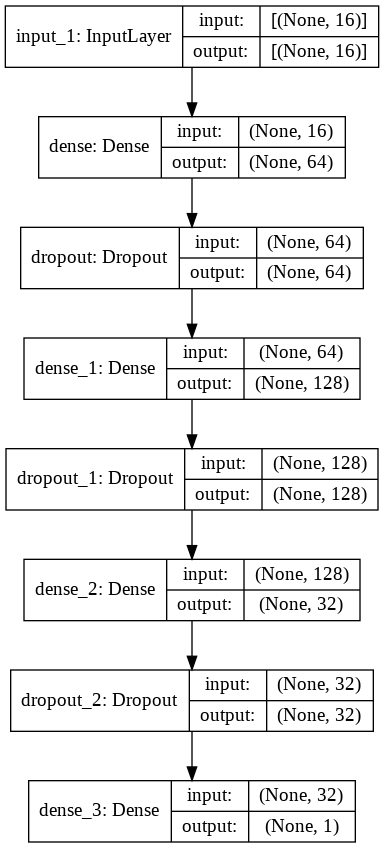

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True )

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [ ]:
from keras import backend as K
def r_2_score(y_true, y_pred):
    SS_resid =  K.sum(K.square( y_true-y_pred )) 
    SS_total = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_resid/(SS_total + K.epsilon()))


In [ ]:
from sklearn.metrics import r2_score
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=[r_2_score])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [ ]:
call_back=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True,mode='min')
history = model.fit(x_train_sc, y_train,validation_data=(x_test_sc, y_test),batch_size=32,epochs=200,callbacks=call_back)


Epoch 1/200
186/186 [==============================] - 1s 3ms/step - loss: 140592.4062 - r_2_score: 0.8200 - val_loss: 135815.4219 - val_r_2_score: 0.8110
Epoch 2/200
186/186 [==============================] - 1s 3ms/step - loss: 140285.2188 - r_2_score: 0.8034 - val_loss: 135619.2656 - val_r_2_score: 0.8164
Epoch 3/200
186/186 [==============================] - 1s 3ms/step - loss: 140677.6094 - r_2_score: 0.8143 - val_loss: 134985.9062 - val_r_2_score: 0.8157
Epoch 4/200
186/186 [==============================] - 1s 3ms/step - loss: 139557.4844 - r_2_score: 0.7941 - val_loss: 134744.7656 - val_r_2_score: 0.8172
Epoch 5/200
186/186 [==============================] - 1s 3ms/step - loss: 141421.2500 - r_2_score: 0.8143 - val_loss: 134660.5156 - val_r_2_score: 0.8188
Epoch 6/200
186/186 [==============================] - 0s 3ms/step - loss: 139634.1562 - r_2_score: 0.8198 - val_loss: 134337.6562 - val_r_2_score: 0.8135
Epoch 7/200
186/186 [==============================] - 1s 3ms/step - l

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [ ]:
model.evaluate(x_test_sc,y_test,batch_size=64)

31/31 [==============================] - 0s 1ms/step - loss: 115865.0625 - r_2_score: 0.9213


[115865.0625, 0.9212514162063599]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [ ]:
y_pred=model.predict(x_test_sc)
print(r2_score(y_test.values,y_pred))

0.9323824204475397


In [ ]:
print(type(y_pred))
print(type(y_test.values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

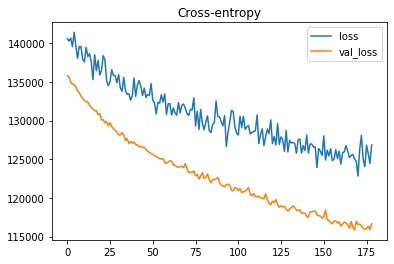

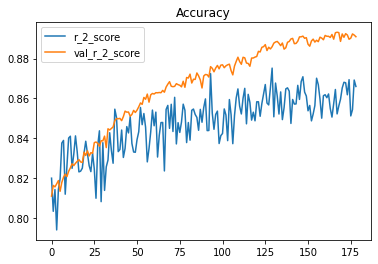

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['r_2_score', 'val_r_2_score']].plot(title="Accuracy")


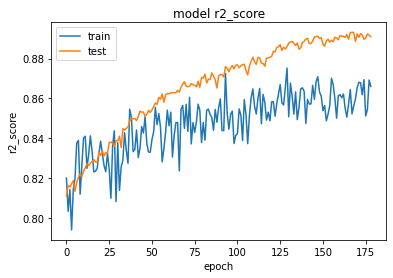

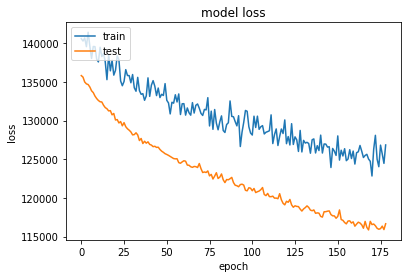

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


In [ ]:
check_point = ModelCheckpoint('./checkpoint', monitor='val_loss',save_best_only=True,save_freq='epoch')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True,mode='min')
history = model.fit(x_train_sc,y_train,batch_size=16,epochs=200,verbose=1,validation_data=(x_test_sc,y_test),callbacks=[callback,check_point])


### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss